# Telco Churn predicition

## Libraries imported

In [1]:
#import all libraries

import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import graphviz
from sklearn.tree import export_graphviz
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression

# Data preperation

In [2]:
#Retrieve the Dataset from the CSV file
pre_df = pd.read_csv('Telco_Customer_Churn.csv')

In [3]:
#Show the first ten rows of the dataset
pre_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
#Size of whole dataset
pre_df.shape

(7043, 21)

In [5]:
#Clean table in case of duplicates
pre_df.drop_duplicates(inplace = True)

In [6]:
#Show none rows has been dropped
pre_df.shape

(7043, 21)

In [7]:
# Remove missing values
pre_df.dropna(inplace = True)

In [8]:
#Show none rows has been dropped
pre_df.shape

(7043, 21)

In [9]:
# remove customer ID, because it doesn't affect the reason question
df = pre_df.iloc[:,1:]

Churn
No     5174
Yes    1869
dtype: int64


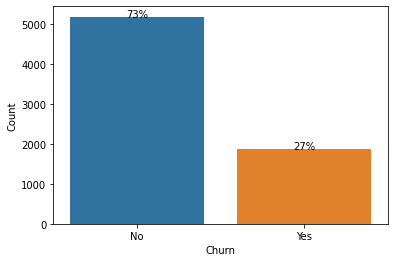

In [10]:
## make barchart BEFORE CLEANING DATA
print(df.groupby(['Churn']).size())
churn_plot = sns.countplot(data=df, x='Churn', order=df.Churn.value_counts().index)
plt.ylabel('Count')
for p in churn_plot.patches:
    height = p.get_height()
    churn_plot.text(p.get_x()+p.get_width()/2., height + 1,'{0:.0%}'.format(height/float(len(df))),ha="center") 
plt.show()

In [11]:
# Converting Total Charges to a numerical data type, so it is mutable 
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors= 'coerce')

In [12]:
#How many of the cols have a null value
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# Show total amount of rows and cols
df.shape

(7043, 20)

In [14]:
#Drop rows where they haven't stayed for more than one month because of total charge is null
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df.shape

(7032, 20)

In [15]:
# check if we have any nulls left
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Features mutable

In [16]:
# Make features mutable from different val to yes and no

# Convert Multiple lines, Online Security, Online Backup, Device Protection, Tech support, Streaming Service, Streaming Movies, so it is mutable
df['MultipleLines'] = df['MultipleLines'].replace("No phone service", "No")
df['OnlineSecurity'] = df['OnlineSecurity'].replace("No internet service", "No")
df['OnlineBackup'] = df['OnlineBackup'].replace("No internet service", "No")
df['DeviceProtection'] = df['DeviceProtection'].replace("No internet service", "No")
df['TechSupport'] = df['TechSupport'].replace("No internet service", "No")
df['StreamingTV'] = df['StreamingTV'].replace("No internet service", "No")
df['StreamingMovies'] = df['StreamingMovies'].replace("No internet service", "No")

#converting senior citizen into category
df['SeniorCitizen'] = df['SeniorCitizen'].replace(1,"Yes")
df['SeniorCitizen'] = df['SeniorCitizen'].replace(0,"No")
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [17]:
#Show the conversion
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,No,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Pie Chart - Churn Ratio

### Bar Chart - Churn ratio

Churn
No     5163
Yes    1869
dtype: int64


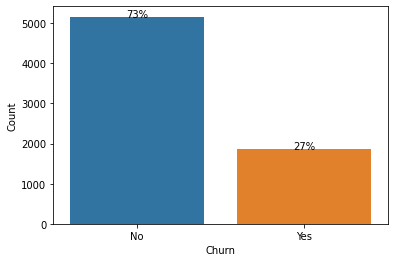

In [18]:
## make barchart / our ZeroR / Baselien
print(df.groupby(['Churn']).size())
churn_plot = sns.countplot(data=df, x='Churn', order=df.Churn.value_counts().index)
plt.ylabel('Count')
for p in churn_plot.patches:
    height = p.get_height()
    churn_plot.text(p.get_x()+p.get_width()/2., height + 1,'{0:.0%}'.format(height/float(len(df))),ha="center") 
plt.show()

In [19]:
#Convertin the predictor variable ( yes and no ) in a binary numeric variable 
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

## Heatmap

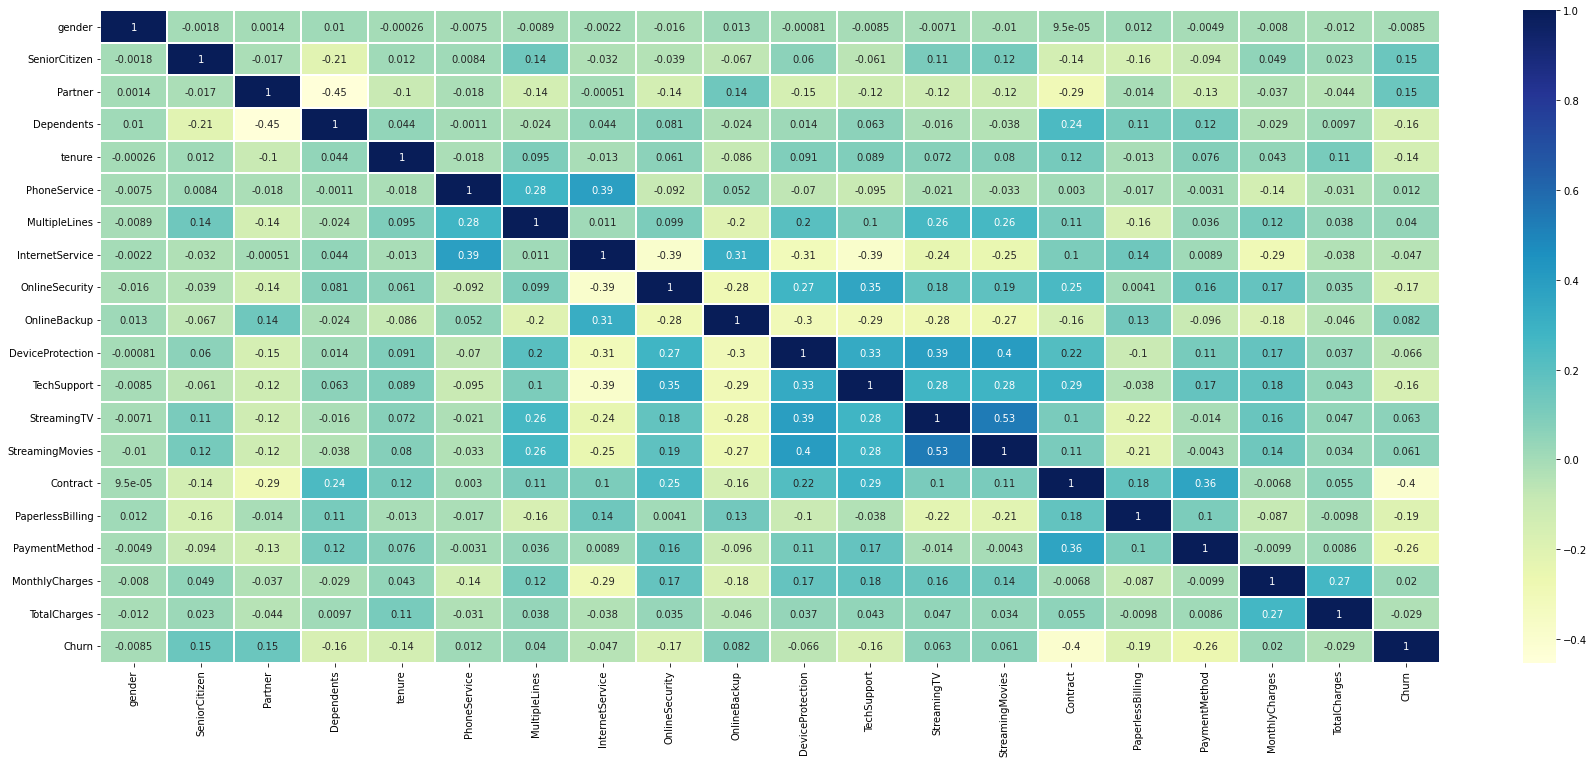

In [20]:
# Create a heat map to illustrate the correlation between feature and Churn

#make figure
plt.figure(
    figsize=(30, 12)
)

# Make the corelation 
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

# Create heatmap
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
                 linewidths=.2, cmap="YlGnBu", annot = True)

In [21]:
# Remove the two features which doesnt have a correlation to churn
df_new = df.drop(columns=['gender','PhoneService'])

In [22]:
#Get rows and columns count
df_new.shape

(7032, 18)

# Modeling

### Premodeling

In [23]:
# Remove churn for training
Features = df_new.columns.drop('Churn')

In [24]:
# Prepare split for the training data and the test data
X = df_new[Features]
y = df_new['Churn']

Use get_dummies to add the additional features, 'Type of Sale', and 'Type'. You still want to include m2 and 'Build Year'. Note that get_dummies will only create dummy features for nominal values -- it will ignore numerical features like m2 and 'Build Year'. List the dummy features that were created for the feature 'Type'.

In [25]:
X = pd.get_dummies(X)

# show the first 5 rows
X.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0


## Decision tree


In [26]:
# Initialize the training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=69
)

### Optimal use of hyper parameters

In [27]:
# define models and parameters
dc_model = DecisionTreeClassifier()

max_depth_arr = [1,2,4,5,6,7,8,10,20]

# define grid search
grid = dict()
grid['max_depth'] = max_depth_arr;

grid_search = GridSearchCV(
    estimator=dc_model, 
    param_grid=grid, n_jobs=-1, 
    scoring='accuracy',error_score=0
)

grid_result = grid_search.fit(X_train,y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.793137 using {'max_depth': 5}
0.736064 (0.000433) with: {'max_depth': 1}
0.765645 (0.009034) with: {'max_depth': 2}
0.789913 (0.010217) with: {'max_depth': 4}
0.793137 (0.009111) with: {'max_depth': 5}
0.790861 (0.012228) with: {'max_depth': 6}
0.785743 (0.009508) with: {'max_depth': 7}
0.780053 (0.010203) with: {'max_depth': 8}
0.763747 (0.012155) with: {'max_depth': 10}
0.737390 (0.003264) with: {'max_depth': 20}


In [28]:
#create the decision tree classifier
dc = DecisionTreeClassifier(max_depth = 5)

#Train model
dc_model = dc.fit(X_train,y_train)

#predict
Decision_y_pred_rfc = dc_model.predict(X_test)

### DT - Classification report

In [29]:
print('Accuracy of Decision tree classifier on test set: {:.5f}'.format(dc_model.score(X_test, y_test)))

Accuracy of Decision tree classifier on test set: 0.77702


In [30]:
### Decision tree - 

In [31]:
print(classification_report(y_test,Decision_y_pred_rfc, digits=4))

              precision    recall  f1-score   support

           0     0.8276    0.8767    0.8514      1281
           1     0.6060    0.5094    0.5535       477

    accuracy                         0.7770      1758
   macro avg     0.7168    0.6930    0.7025      1758
weighted avg     0.7674    0.7770    0.7706      1758



In [32]:
dc_imp=list(dc_model.feature_importances_)

dc_colname=list(X_train.columns)

#Create dict for datafram
dc_dict={'Feature':dc_colname,'Importance':dc_imp}

#Create dataframe
dc_feature_imp=pd.DataFrame(dc_dict)
X

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1,0,0,1,0,1,0,1,1,0,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,1,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
7041,4,74.40,306.60,0,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1


In [33]:
dc_feature_rank=dc_feature_imp.sort_values(by='Importance',ascending = False)

### DT - Feature importance

In [34]:
dc_feature_rank.head(10)

,Feature,Importance
26,Contract_Month-to-month,0.505002
0,tenure,0.182513
12,InternetService_Fiber optic,0.155176
2,TotalCharges,0.053858
1,MonthlyCharges,0.025204
13,InternetService_No,0.024703
10,MultipleLines_Yes,0.020197
27,Contract_One year,0.013703
20,TechSupport_No,0.007339
23,StreamingTV_Yes,0.005336


### DT - Confusion matrix

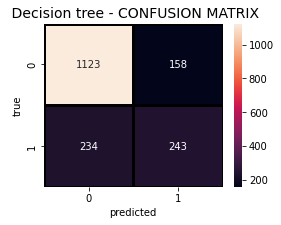

In [35]:
plt.figure(figsize=(4,3))
sns.heatmap(
    confusion_matrix(
        y_test, 
        Decision_y_pred_rfc
        ),
        annot=True,
        fmt = "d",
        linecolor="k",
        linewidths=3
)
    
plt.title(" Decision tree - CONFUSION MATRIX",fontsize=14)
plt.xlabel("predicted")
plt.ylabel("true")
plt.show()

## Decision tree w. RFECV

In [36]:
# Evaluation with the RFECV to find the most important features in regard to accurassy 
Decision_rfc = DecisionTreeClassifier(max_depth = 5)

Decision_rfecv = RFECV(estimator = Decision_rfc, step=1, cv=StratifiedKFold(6), scoring='accuracy')
Decision_rfecv_model = Decision_rfecv.fit(X_train,y_train)

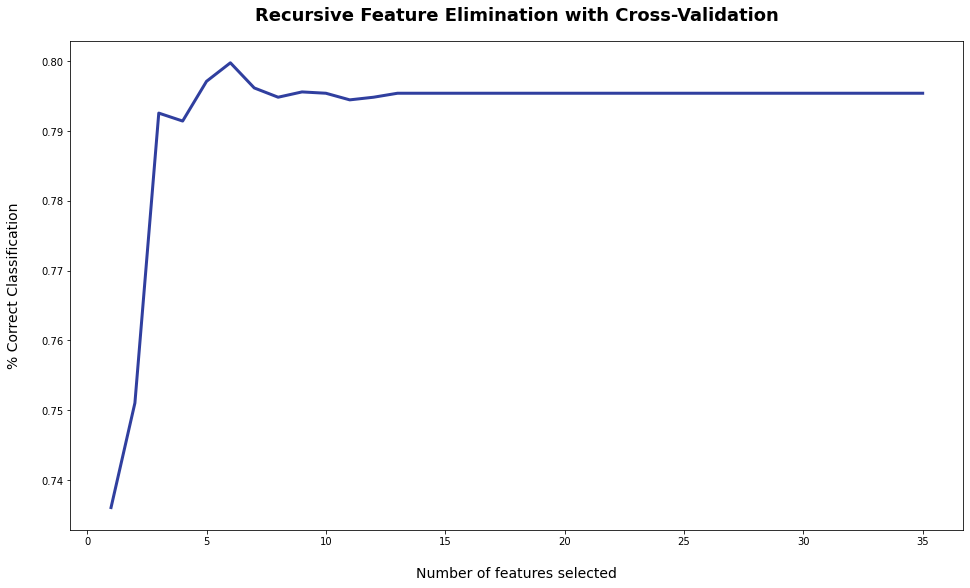

In [37]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(Decision_rfecv.cv_results_['mean_test_score']) + 1), Decision_rfecv.cv_results_['mean_test_score'], color='#303F9F', linewidth=3)
plt.show()

### DT - Feature importance after RFECV

In [38]:
Decision_rfecv_imp = Decision_rfecv_model.estimator_.feature_importances_

In [39]:
X_D = X_train.copy()
X_D_Dropped = X_D.drop(X_D.columns[np.where(Decision_rfecv.support_ == False)[0]], axis=1, inplace=True)

In [40]:
#Get the col names of Decision tree
d_colname=list(X_D.columns)
#d_colname

In [41]:
#Create dict for datafram
rfecv_dict={'Feature':d_colname,'Importance':Decision_rfecv_imp}

#Create dataframe
rfecv_feature_imp=pd.DataFrame(rfecv_dict).sort_values(by='Importance',ascending = False)

In [42]:
rfecv_feature_imp

,Feature,Importance
5,Contract_Month-to-month,0.511898
0,tenure,0.183504
4,InternetService_Fiber optic,0.157295
2,TotalCharges,0.076570
1,MonthlyCharges,0.045692
3,InternetService_DSL,0.025040


In [43]:
len(Decision_rfecv_model.support_)

35

In [44]:
#Print results
print('Optimal feature amount:',Decision_rfecv_model.n_features_)

# Here we look into our orignal columns to see which are listen in our Recursive model of features
print('Chosen features:', list(X.columns[Decision_rfecv_model.support_]))

Optimal feature amount: 6
Chosen features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'InternetService_DSL', 'InternetService_Fiber optic', 'Contract_Month-to-month']


### DT - Classification report w. RFECV

In [45]:
#We find the acuracy of our model
dc_prediction = Decision_rfecv.predict(X_test)
print(classification_report(y_test, dc_prediction, digits=4))

              precision    recall  f1-score   support

           0     0.8444    0.8470    0.8457      1281
           1     0.5856    0.5807    0.5832       477

    accuracy                         0.7747      1758
   macro avg     0.7150    0.7139    0.7144      1758
weighted avg     0.7742    0.7747    0.7744      1758



In [46]:
print('Accuracy of Decision tree classifier on test set: {:.5f}'.format(Decision_rfecv.score(X_test, y_test)))

Accuracy of Decision tree classifier on test set: 0.77474


### DT - Confusion matrix w. RFECV

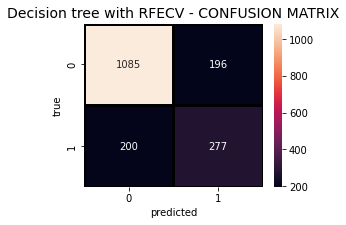

In [47]:
plt.figure(figsize=(4,3))
sns.heatmap(
    confusion_matrix(
        y_test,
        dc_prediction
        ),
        annot=True,
        fmt = "d",
        linecolor="k",
        linewidths=3
)

plt.xlabel("predicted")
plt.ylabel("true")
plt.title("Decision tree with RFECV - CONFUSION MATRIX",fontsize=14)
plt.show()

## Random forrest

In [48]:
# Initialize the training set and test set. Split the Splits at 25% default
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=69
)

In [49]:
X_train.shape

(5274, 35)

### Optimal use of hyper parameters

In [50]:
# define dataset, models and parameters
rf_model = RandomForestClassifier()

n_estimators = [10, 100, 200, 1000]
max_depth = [1,2,4,6,7,10,20]

# define grid search
rf_grid = dict(
    n_estimators=n_estimators,
    max_depth = max_depth
)

# estimator = our model we want to find the best params from
# param_grid = is our parameter we want to use
# n_jobs = Number of jobs to run in parallel, we dont need that
# We have used the gridSearchCV without the crossvalidation CV
rf_grid_search = GridSearchCV(
  estimator=rf_model, 
  param_grid=rf_grid, 
  n_jobs=-1, 
  scoring='accuracy',
  error_score=0
)

rf_grid_result = rf_grid_search.fit(X,y)

# summarize results
print("Best: %f using %s" % (rf_grid_result.best_score_, rf_grid_result.best_params_))
means = rf_grid_result.cv_results_['mean_test_score']
stds = rf_grid_result.cv_results_['std_test_score']
params = rf_grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.802900 using {'max_depth': 7, 'n_estimators': 100}
0.734215 (0.000261) with: {'max_depth': 1, 'n_estimators': 10}
0.734215 (0.000261) with: {'max_depth': 1, 'n_estimators': 100}
0.734215 (0.000261) with: {'max_depth': 1, 'n_estimators': 200}
0.734215 (0.000261) with: {'max_depth': 1, 'n_estimators': 1000}
0.752981 (0.017482) with: {'max_depth': 2, 'n_estimators': 10}
0.742888 (0.007649) with: {'max_depth': 2, 'n_estimators': 100}
0.748008 (0.003999) with: {'max_depth': 2, 'n_estimators': 200}
0.740897 (0.006822) with: {'max_depth': 2, 'n_estimators': 1000}
0.792376 (0.007956) with: {'max_depth': 4, 'n_estimators': 10}
0.787399 (0.007514) with: {'max_depth': 4, 'n_estimators': 100}
0.788964 (0.007003) with: {'max_depth': 4, 'n_estimators': 200}
0.788253 (0.009312) with: {'max_depth': 4, 'n_estimators': 1000}
0.799060 (0.009150) with: {'max_depth': 6, 'n_estimators': 10}
0.799913 (0.008953) with: {'max_depth': 6, 'n_estimators': 100}
0.800055 (0.009849) with: {'max_depth': 6, 'n_

In [51]:
# Create random forest classifer object that uses entropy - very slow
rfc = RandomForestClassifier(random_state=50, n_jobs=-1 , n_estimators=200, max_depth=7)

# Train model
rfc_model = rfc.fit(X_train, y_train)

# Predict    
y_pred_rfc = rfc_model.predict(X_test)

In [52]:
print('Accuracy of random forest classifier on test set: {:.5f}'.format(rfc_model.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.79238


### RF - Classification report

In [53]:
print(classification_report(y_test,y_pred_rfc,digits=4))

              precision    recall  f1-score   support

           0     0.8290    0.9009    0.8634      1281
           1     0.6530    0.5010    0.5670       477

    accuracy                         0.7924      1758
   macro avg     0.7410    0.7010    0.7152      1758
weighted avg     0.7813    0.7924    0.7830      1758



In [54]:
rfc_imp=list(rfc_model.feature_importances_)

In [55]:
rfc_colname=list(X_train.columns)

#Create dict for datafram
rfc_dict={'Feature':rfc_colname,'Importance':rfc_imp}

#Create dataframe
rfc_feature_imp=pd.DataFrame(rfc_dict)

In [56]:
rfc_feature_rank=rfc_feature_imp.sort_values(by='Importance',ascending = False)

### RF - Feature importance

In [57]:
rfc_feature_rank

,Feature,Importance
0,tenure,0.171213
26,Contract_Month-to-month,0.142748
2,TotalCharges,0.105233
1,MonthlyCharges,0.086052
12,InternetService_Fiber optic,0.085551
28,Contract_Two year,0.058818
33,PaymentMethod_Electronic check,0.055265
13,InternetService_No,0.041493
27,Contract_One year,0.024797
15,OnlineSecurity_Yes,0.022690


### RF - Confusion matrix

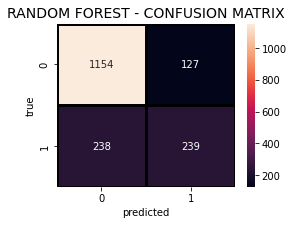

In [58]:
plt.figure(figsize=(4,3))
sns.heatmap(
    confusion_matrix(
        y_test, 
        y_pred_rfc
      ),
      annot=True,fmt = "d",linecolor="k",linewidths=3
)

plt.xlabel("predicted")
plt.ylabel("true")
plt.title("RANDOM FOREST - CONFUSION MATRIX",fontsize=14)
plt.show()

## Random forrest w. RFECV

In [59]:
X.shape

(7032, 35)

In [60]:
# Train model with Cross validation
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(6), scoring='accuracy')

# Fit the model
rfecv_model = rfecv.fit(X_train, y_train)

# Predict    
y_pred_rfcv = rfecv_model.predict(X_test)

In [61]:
#Print results
print('Optimal feature amount:',rfecv_model.n_features_)

# Here we look into our orignal columns to see which are listen in our Recursive model of features
print('Chosen features:', list(X.columns[rfecv_model.support_]))

Optimal feature amount: 21
Chosen features: ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_No', 'SeniorCitizen_Yes', 'MultipleLines_Yes', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes', 'OnlineBackup_No', 'TechSupport_No', 'TechSupport_Yes', 'StreamingMovies_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes', 'PaymentMethod_Electronic check']


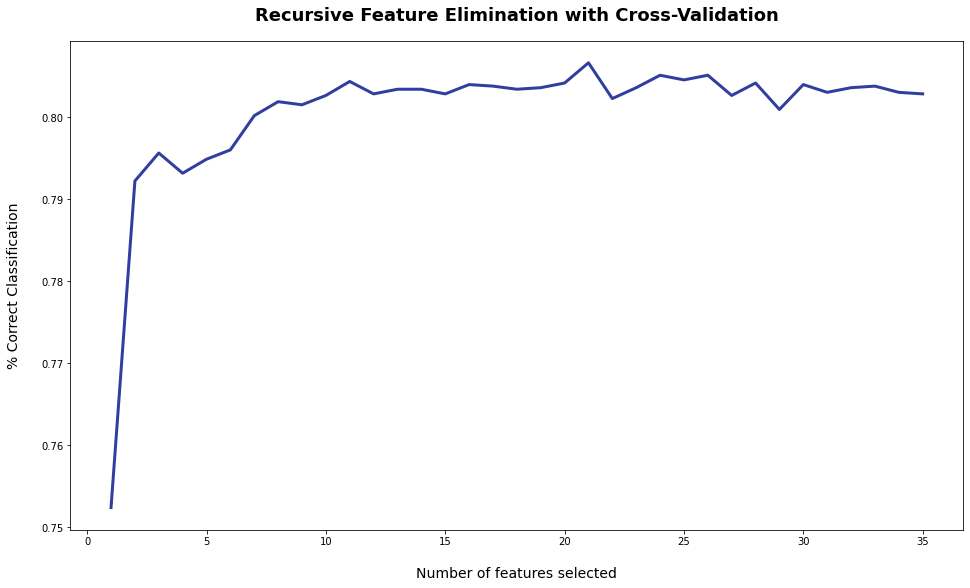

In [62]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv_model.cv_results_['mean_test_score']) + 1), rfecv_model.cv_results_['mean_test_score'], color='#303F9F', linewidth=3)
plt.show()

### RF - feature importance

In [63]:
# Initialize the training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=69
)

In [64]:
rfecv_imp = rfecv_model.estimator_.feature_importances_

In [65]:
rfecv_imp

array([0.17245374, 0.0965291 , 0.12090243, 0.00944045, 0.01062279,
       0.00885446, 0.02268559, 0.08597309, 0.03853836, 0.01894354,
       0.0199968 , 0.00852524, 0.00991134, 0.0122266 , 0.01040801,
       0.18698005, 0.02382347, 0.05786341, 0.01449674, 0.01332898,
       0.05749581])

In [66]:
len(X.columns)

35

In [67]:
#Remove the none important features
X_rf = X_train.copy()
X_Dropped =  (len(X_rf.columns) != 32) and X_rf.drop(X_rf.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

In [68]:
len(X_rf.columns)

21

In [69]:
rfecv_colname=list(X_rf.columns)

In [70]:
#Create dict for datafram
rfecv_dict={'Feature':rfecv_colname,'Importance':rfecv_imp}

#Create dataframe
rfecv_feature_imp=pd.DataFrame(rfecv_dict)

In [71]:
rfecv_feature_rank = rfecv_feature_imp.sort_values(by='Importance',ascending = False)

In [72]:
rfecv_feature_rank.head(21)

,Feature,Importance
15,Contract_Month-to-month,0.186980
0,tenure,0.172454
2,TotalCharges,0.120902
1,MonthlyCharges,0.096529
7,InternetService_Fiber optic,0.085973
17,Contract_Two year,0.057863
20,PaymentMethod_Electronic check,0.057496
8,InternetService_No,0.038538
16,Contract_One year,0.023823
6,InternetService_DSL,0.022686


### RF - Classification report w. RFECV

In [73]:
print('Accuracy of random forest classifier on test set: {:.5f}'.format(rfecv_model.score(X_test, y_test)))

Accuracy of random forest classifier on test set: 0.78953


In [74]:
print(classification_report(y_test,y_pred_rfcv, digits=4))

              precision    recall  f1-score   support

           0     0.8294    0.8954    0.8611      1281
           1     0.6427    0.5052    0.5657       477

    accuracy                         0.7895      1758
   macro avg     0.7360    0.7003    0.7134      1758
weighted avg     0.7787    0.7895    0.7810      1758



### RF - Confusion matrix w. RFECV

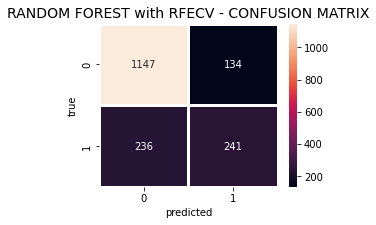

In [75]:
# Call confusion_matrix function from sklearn.metrics using actual y_test and predicted y_test data sets 
plt.figure(figsize=(4,3))
sns.heatmap(
    confusion_matrix(
        y_test,
        y_pred_rfcv
    ),
    annot=True,
    fmt = "d",
    linewidths=3
)
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("RANDOM FOREST with RFECV - CONFUSION MATRIX",fontsize=14)
plt.show()

## Logistic regression

In [76]:
# Save dataframe column titles to list for reassigning after min max scale 
X_Lr = X.copy()
cols = X_Lr.columns

In [77]:
# Instantiate min-max scaling object
mm = MinMaxScaler()

# Fit and transform our feature dataframe
X_Lr = pd.DataFrame(mm.fit_transform(X_Lr))

# Reassign column names so new dataframe has corresponding names
X_Lr.columns = cols

In [78]:
# Initialize the training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_Lr,
    y,
    random_state=69
)

### Optimal use of hyper parameter

In [79]:
# define models and parameters
lr_model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
lr_grid = dict(
    solver=solvers,
    C=c_values
)

lr_grid_search = GridSearchCV(
    estimator = lr_model,
     param_grid = lr_grid, 
     n_jobs = -1,
     scoring = 'accuracy',
     error_score = 0
)

lr_grid_result = lr_grid_search.fit(X,y)
# summarize results
print("Best: %f using %s" % (lr_grid_result.best_score_, lr_grid_result.best_params_))
means = lr_grid_result.cv_results_['mean_test_score']
stds = lr_grid_result.cv_results_['std_test_score']
params = lr_grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-le

Best: 0.804891 using {'C': 0.1, 'solver': 'newton-cg'}
0.804322 (0.009341) with: {'C': 100, 'solver': 'newton-cg'}
0.798492 (0.006650) with: {'C': 100, 'solver': 'lbfgs'}
0.803184 (0.006497) with: {'C': 100, 'solver': 'liblinear'}
0.804322 (0.009341) with: {'C': 10, 'solver': 'newton-cg'}
0.799487 (0.006524) with: {'C': 10, 'solver': 'lbfgs'}
0.803184 (0.006497) with: {'C': 10, 'solver': 'liblinear'}
0.803469 (0.007674) with: {'C': 1.0, 'solver': 'newton-cg'}
0.799345 (0.006438) with: {'C': 1.0, 'solver': 'lbfgs'}
0.803184 (0.006485) with: {'C': 1.0, 'solver': 'liblinear'}
0.804891 (0.006043) with: {'C': 0.1, 'solver': 'newton-cg'}
0.800625 (0.006927) with: {'C': 0.1, 'solver': 'lbfgs'}
0.804464 (0.006603) with: {'C': 0.1, 'solver': 'liblinear'}
0.804180 (0.007685) with: {'C': 0.01, 'solver': 'newton-cg'}
0.801762 (0.007019) with: {'C': 0.01, 'solver': 'lbfgs'}
0.803184 (0.007994) with: {'C': 0.01, 'solver': 'liblinear'}


In [80]:
# Create classifier with logistic regression
logreg = LogisticRegression(C = 0.1, solver ='newton-cg', random_state=50)


In [81]:
#Fit model
logreg_model = logreg.fit(X_train,y_train)

#Predict
Log_y_pred_logreg = logreg_model.predict(X_test)

### LR - Classification report

In [82]:
print('Accuracy of LR classifier on test without RFECV: {:.10f}'.format(logreg_model.score(X_test, y_test)))

Accuracy of LR classifier on test without RFECV: 0.7878270762


In [83]:
print(classification_report(y_test,Log_y_pred_logreg, digits=4))

              precision    recall  f1-score   support

           0     0.8290    0.8931    0.8598      1281
           1     0.6376    0.5052    0.5637       477

    accuracy                         0.7878      1758
   macro avg     0.7333    0.6991    0.7118      1758
weighted avg     0.7770    0.7878    0.7795      1758



### LR - Confusion matrix

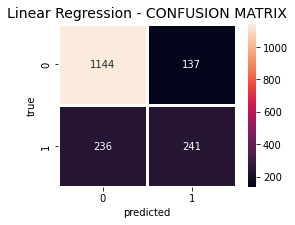

In [84]:
# Call confusion_matrix function from sklearn.metrics using actual y_test and predicted y_test data sets 
plt.figure(figsize=(4,3))
sns.heatmap(
    confusion_matrix(
        y_test,
        Log_y_pred_logreg
    ),
    annot=True,
    fmt = "d",
    linewidths=3
)
plt.xlabel("predicted")
plt.ylabel("true")
plt.title("Linear Regression - CONFUSION MATRIX",fontsize=14)
plt.show()


### LR - Feature importance

In [85]:
importance = logreg.coef_[0]

In [86]:
log_imp=list(importance)

In [87]:
log_colname=list(X.columns)

In [88]:
#Create dict for datafram
log_dict={'Column_Names_rfc':log_colname,'coaf':log_imp}

#Create dataframe
log_feature_imp = pd.DataFrame(log_dict)

log_feature_rank = log_feature_imp.sort_values(by='coaf',ascending = False)

log_feature_rank.head(10)

,Column_Names_rfc,coaf
12,InternetService_Fiber optic,0.759317
26,Contract_Month-to-month,0.734109
33,PaymentMethod_Electronic check,0.254819
14,OnlineSecurity_No,0.216948
20,TechSupport_No,0.146948
25,StreamingMovies_Yes,0.146417
30,PaperlessBilling_Yes,0.141776
4,SeniorCitizen_Yes,0.121023
1,MonthlyCharges,0.111504
10,MultipleLines_Yes,0.107372


## Logistic regression w. RFECV


In [89]:
# create our LR_model
rfecv_LR = RFECV(estimator=logreg_model, cv=StratifiedKFold(6), scoring="accuracy")

# Fit the model to our X and y training sets
rfecv_model_LR = rfecv_LR.fit(X_train, y_train)

#predict
y_pred_rfcv_LR = rfecv_model_LR.predict(X_test)

In [90]:
#Print results
print('Optimal feature amount:',rfecv_model_LR.n_features_)

# Here we look into our orignal columns to see which are listen in our Recursive model of features
print('Chosen features that have been removed:', list(X.columns[rfecv_model_LR.support_] ^ X.columns))

Optimal feature amount: 25
Chosen features that have been removed: ['Contract_One year', 'Dependents_No', 'DeviceProtection_No', 'DeviceProtection_Yes', 'InternetService_DSL', 'Partner_No', 'Partner_Yes', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check']


### LR - Classification report w. RFECV

In [91]:
print('Accuracy of LR classifier on test with RFECV:: {:.10}'.format(rfecv_model_LR.score(X_test, y_test)))

Accuracy of LR classifier on test with RFECV:: 0.7912400455


In [92]:
print(classification_report(y_test,y_pred_rfcv_LR, digits=4))

              precision    recall  f1-score   support

           0     0.8307    0.8962    0.8622      1281
           1     0.6463    0.5094    0.5698       477

    accuracy                         0.7912      1758
   macro avg     0.7385    0.7028    0.7160      1758
weighted avg     0.7806    0.7912    0.7828      1758



In [93]:
#Get the coef
rfecv_imp_LR = list(rfecv_model_LR.estimator_.coef_[0])

In [94]:
#Get Cols
X_LR = X.copy()
len(X_LR.columns)

35

In [95]:
rfecv_colName_LR = X_LR.drop(X_LR.columns[np.where(rfecv_model_LR.support_ == False)[0]], axis=1, inplace=True)
LR_Colnames = list(X_LR.columns)
len(LR_Colnames)

25

In [96]:
#Create dict for datafram
rfecv_dict_LR = {'Feature':LR_Colnames,'Coaf':rfecv_imp_LR}

In [97]:
#Create dataframe
rfecv_feature_imp_LR = pd.DataFrame(rfecv_dict_LR)

In [98]:
# SOrt the table for coef
rfecv_feature_coef = rfecv_feature_imp_LR.sort_values(by='Coaf',ascending = False)

### LR - Feature Coef w. RFECV

In [99]:
rfecv_feature_coef

,Feature,Coaf
20,Contract_Month-to-month,0.782372
8,InternetService_Fiber optic,0.714191
24,PaymentMethod_Electronic check,0.334081
10,OnlineSecurity_No,0.216929
19,StreamingMovies_Yes,0.146231
14,TechSupport_No,0.146193
23,PaperlessBilling_Yes,0.142145
4,SeniorCitizen_Yes,0.116314
7,MultipleLines_Yes,0.106160
1,MonthlyCharges,0.105806


### LR - Confusion matrix w. RFECV

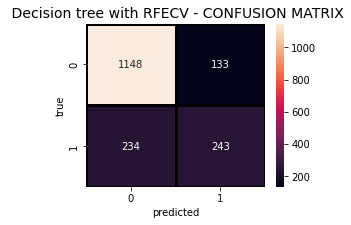

In [100]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rfcv_LR),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title(" Decision tree with RFECV - CONFUSION MATRIX",fontsize=14)
plt.xlabel("predicted")
plt.ylabel("true")
plt.show()

# Evaluation

## Get training data

In [101]:
# Initialize the training set and test set
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=69
)

## create ROC curve

DecisionTree:0.8238887334154887
LogisticRegression:0.6401085367989172
RandomForrest:0.8411078216212765


<Figure size 432x288 with 0 Axes>

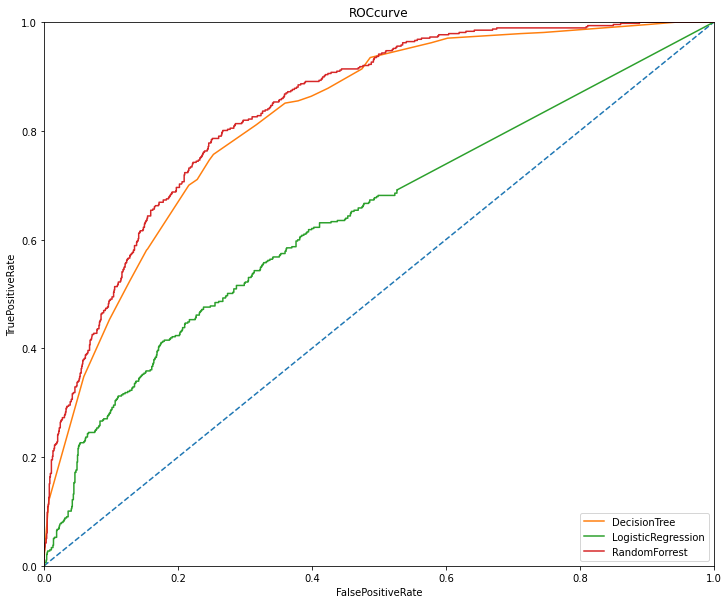

In [103]:
from sklearn import metrics
#Initialize figure 
plt.figure()
### Get the tree model predict the properbility for each of the models
dt_prediction = Decision_rfecv_model.predict_proba(X_test)
rf_prediction = rfecv_model.predict_proba(X_test)
lr_prediction = rfecv_model_LR.predict_proba(X_test)

#Get the metrics/ plots for the ROC curve against y test target
fpr_dt,tpr_dt,thresholds = metrics.roc_curve(y_test,dt_prediction[:,1],pos_label=1)
fpr_lr,tpr_lr,thresholds = metrics.roc_curve(y_test,lr_prediction[:,1],pos_label=1)
fpr_rf,tpr_rf,thresholds = metrics.roc_curve(y_test,rf_prediction[:,1],pos_label=1)

# our metrics
print("DecisionTree:{0}".format(metrics.auc(fpr_dt,tpr_dt)))
print("LogisticRegression:{0}".format(metrics.auc(fpr_lr,tpr_lr)))
print("RandomForrest:{0}".format(metrics.auc(fpr_rf,tpr_rf)))

# show figure
fig=plt.figure(figsize=(12,10))
ax=fig.add_subplot(111)
ax.plot([0,1],[0,1],ls="--")
ax.set_xlabel('FalsePositiveRate')
ax.set_ylabel('TruePositiveRate')
ax.set_title('ROCcurve')
ax.set_xlim([0.0,1.0])
ax.set_ylim([0.0,1.0])
ax.plot(fpr_dt,tpr_dt,label="DecisionTree")
ax.plot(fpr_lr,tpr_lr,label="LogisticRegression")
ax.plot(fpr_rf,tpr_rf,label="RandomForrest")
ax.legend(loc="lower right")
plt.show()



## Churn rate by tenure


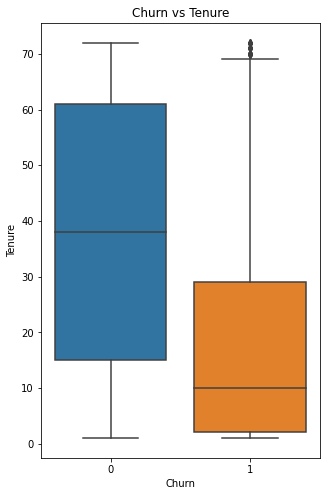

In [104]:
plt.figure(figsize=(5, 8))
sns.boxplot(x = df_new.Churn, y = df_new.tenure)
plt.ylabel('Tenure')
plt.title('Churn vs Tenure')
plt.show()
plt.close()

In [105]:
def tenure_count(row):
    if row['tenure'] <= 12 :
        return 'tenure_0-12'
    elif (row['tenure'] > 12 and row['tenure'] <= 24):
        return 'tenure_12-24'
    elif (row['tenure'] > 24 and row['tenure'] <= 36):
        return 'tenure_24-36'
    elif (row['tenure'] > 36 and row['tenure'] <= 48):
        return 'tenure_36-48'
    elif (row['tenure'] > 48 and row['tenure'] <= 60):
        return 'tenure_48-60'
    else:
        return 'tenure_60+'
    
df_new['grp_tenure'] = df_new.apply(tenure_count,axis = 1)
df_new['grp_tenure'].value_counts()

tenure_0-12     2175
tenure_60+      1407
tenure_12-24    1024
tenure_24-36     832
tenure_48-60     832
tenure_36-48     762
Name: grp_tenure, dtype: int64

In [106]:
def plot_bar(df_new,var1,var2):
    grp = df_new.groupby(var1)[var2].value_counts()
    grp.unstack().plot(kind = 'bar')
    plt.xlabel(var1)
    plt.ylabel("Count of Churn Customers")
    plt.title("Churn Customer Distribution by {}".format(var1)) 

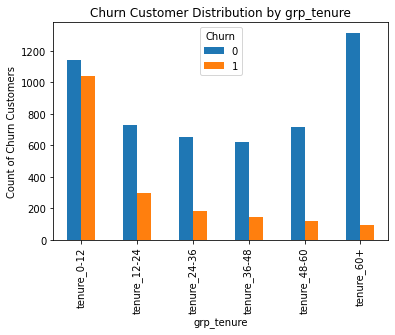

In [107]:
plot_bar(df_new,'grp_tenure','Churn')

# Churn rate distribution by contract (contract month to month)

In [108]:
df_new['Contract'].value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [109]:
def contract_count(row):
    if row['Contract'] == 'Month-to-month' :
        return 'Month_to_month'
    elif row['Contract'] == 'Two year' :
        return 'Two_year'
    elif row['Contract'] == 'One year':
        return 'One_year'
    else:
      return 'Other'
    
df_new['grp_contract'] = df_new.apply(contract_count ,axis = 1)
df_new['grp_contract'].value_counts()

Month_to_month    3875
Two_year          1685
One_year          1472
Name: grp_contract, dtype: int64

In [110]:
def plot_bar(df_new,var1,var2):
    grp = df_new.groupby(var1)[var2].value_counts()
    grp.unstack().plot(kind = 'bar')
    plt.xlabel(var1)
    plt.ylabel("Count of Churn Customers")
    plt.title("Churn Customer Distribution by {}".format(var1)) 

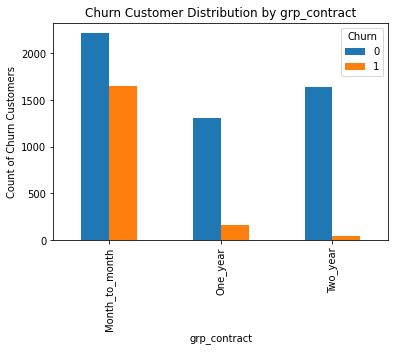

In [111]:
plot_bar(df_new,'grp_contract','Churn')

# Churn rate distribution by internet service

In [112]:
df_new['InternetService'].value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [113]:
def internet_count(row):
    if row['InternetService'] == 'Fiber optic' :
        return 'Fiber_optic'
    elif row['InternetService'] == 'DSL' :
        return 'DSL'
    elif row['InternetService'] == 'No':
        return 'No'
    else:
      return 'Other'
    
df_new['grp_internet_service'] = df_new.apply(internet_count ,axis = 1)
df_new['grp_internet_service'].value_counts()

Fiber_optic    3096
DSL            2416
No             1520
Name: grp_internet_service, dtype: int64

In [114]:
def plot_bar(df_new,var1,var2):
    grp = df_new.groupby(var1)[var2].value_counts()
    grp.unstack().plot(kind = 'bar')
    plt.xlabel(var1)
    plt.ylabel("Count of Churn Customers")
    plt.title("Churn Customer Distribution by {}".format(var1)) 

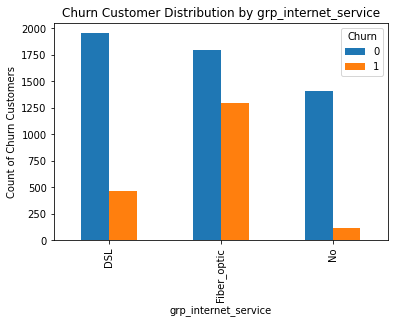

In [115]:
plot_bar(df_new,'grp_internet_service','Churn')